In [101]:
from pathlib import Path
import pandas as pd
import cv2 as cv
from PIL import Image
from tqdm import tqdm
import pyspng
import albumentations as A
from torch.utils.data import Dataset 
import matplotlib.pyplot as plt
from natsort import natsorted
from time import time

thispath = Path.cwd().resolve()

datadir = Path(thispath.parent / "data")
pyhistdir = Path(datadir / "Mask_PyHIST_v2")

labels_csv = pd.read_csv(datadir / "labels.csv", index_col=0)

dataset = labels_csv.index.values
labels = labels_csv.values

	
dataset_path = natsorted([i for i in pyhistdir.rglob("*_densely_filtered_paths.csv")], )

number_patches = 0
path_patches = []
for wsi in tqdm(dataset_path):

	csv_instances = pd.read_csv(wsi).to_numpy()
	# csv_instances.values
	l_csv = len(csv_instances)
	
	number_patches = number_patches + l_csv
	path_patches.extend(csv_instances)

100%|██████████| 1318/1318 [00:05<00:00, 240.19it/s]


  0%|          | 0/10 [00:00<?, ?it/s]

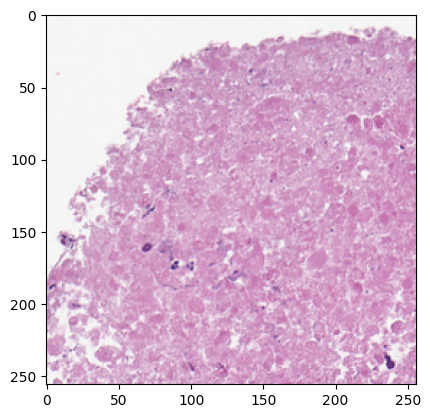

 10%|█         | 1/10 [00:00<00:01,  4.81it/s]

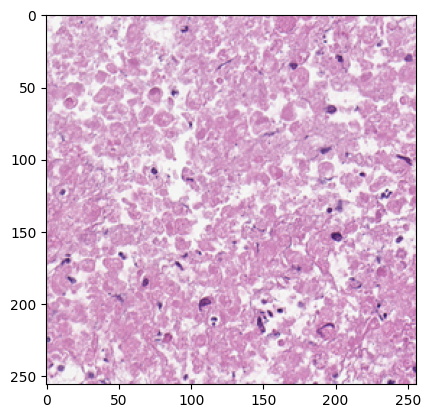

 20%|██        | 2/10 [00:00<00:01,  4.62it/s]

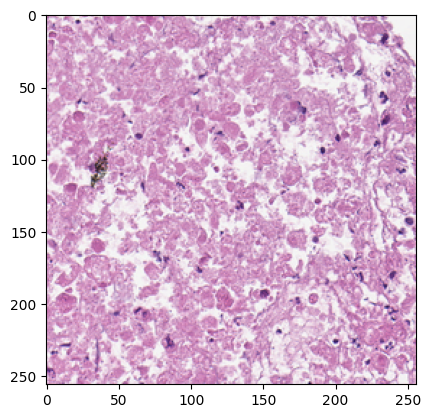

 30%|███       | 3/10 [00:00<00:01,  4.64it/s]

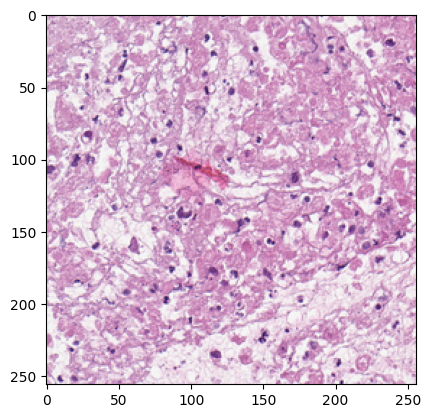

 40%|████      | 4/10 [00:00<00:01,  4.75it/s]

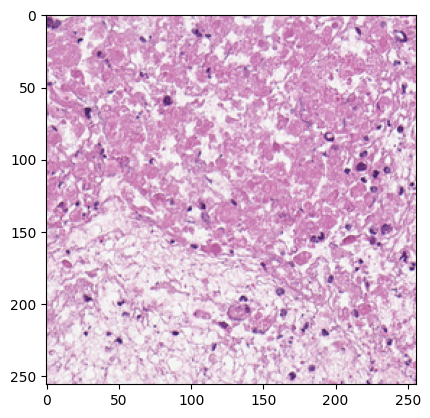

 50%|█████     | 5/10 [00:01<00:01,  4.83it/s]

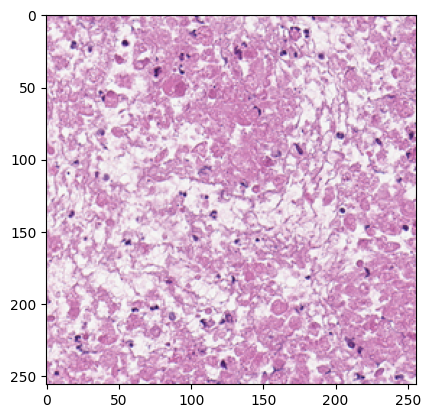

 60%|██████    | 6/10 [00:01<00:00,  4.86it/s]

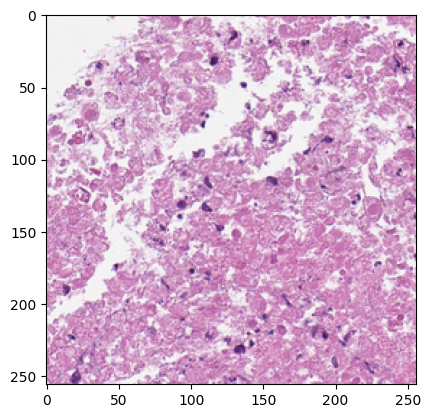

 70%|███████   | 7/10 [00:01<00:00,  4.85it/s]

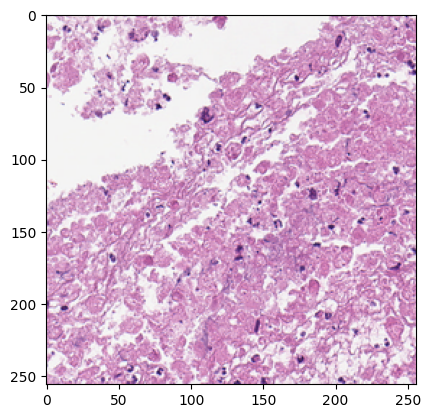

 80%|████████  | 8/10 [00:01<00:00,  4.89it/s]

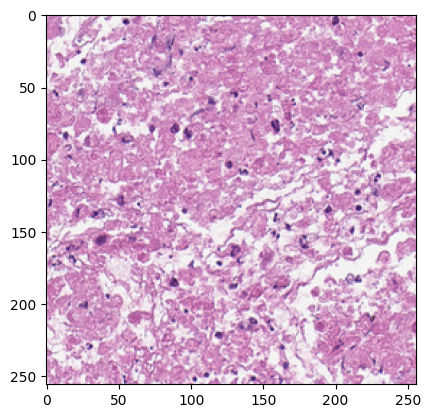

 90%|█████████ | 9/10 [00:01<00:00,  4.92it/s]

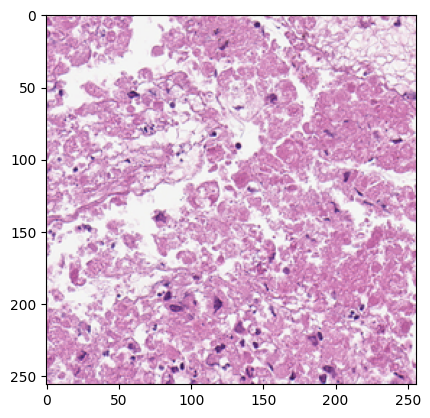

100%|██████████| 10/10 [00:02<00:00,  4.85it/s]

00:00:02.07


In [127]:
import numpy as np
import pyspng

start = time()
for image in tqdm(path_patches[:10]):
    with open(image[0], 'rb') as fin:
        img = pyspng.load(fin.read())

    plt.imshow(img)
    plt.show()


timer(start, time())
